# Import of packages

In [1]:
'''To install the required packages that are not included in Colaboratory.'''
#Installation of packages that are not included in Colaboratory
!pip install kneed
!pip install osmnx

'''To install a specific version of the matplotlib package.'''
!pip install matplotlib==3.1.3

'''To import the required packages.'''
import pandas as pd
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import math
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from kneed import KneeLocator
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

#import osmnx as ox

  Using cached osmnx-1.0.1-py2.py3-none-any.whl (87 kB)
  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached pandas-1.2.3-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached pyproj-3.0.1-cp38-cp38-win_amd64.whl (14.5 MB)
  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)
  Using cached Shapely-1.7.1-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached matplotlib-3.3.4-cp38-cp38-win_amd64.whl (8.5 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Jos\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jos\\AppData\\Local\\Temp\\pip-install-zabayrvd\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jos\\AppData\\Local\\Temp\\pip-install-zabayrvd\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Jos\AppData\Local\Temp\pip-pip-egg-info-3m9h0vf8'
         cwd: C:\Users\Jos\AppData\Local\Temp\pip-install-zabayrvd\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


  Using cached Fiona-1.8.18.tar.gz (1.3 MB)


# Settings

In [2]:
'''To display all output results of a Jupyter cell.'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
'''To ensure that the output results of extensive output results are not truncated.'''
#pd.options.display.max_rows = 4000

'To ensure that the output results of extensive output results are not truncated.'

# To import csv files

In [4]:
''' To import the df_for_edges dfs of Belgium and the Netherlands'''
df_for_edges = pd.read_csv(r'/Users/Jos/Documents/KU Leuven/Thesis/GitHub/Thesis_Train/df_for_edges_18-03_Ine/df_for_edges_Belgium.csv', sep=",")
df_for_edges_Netherlands = pd.read_csv(r'/Users/Jos/Documents/KU Leuven/Thesis/GitHub/Thesis_Train/df_for_edges_18-03_Ine/df_for_edges_Netherlands.csv', sep=",")
df_for_edges
df_for_edges_Netherlands

' To import the df_for_edges dfs of Belgium and the Netherlands'

,route_id,stop_name_1,stop_name_2
0,115,TOURNAI,FROYENNES
1,115,FROYENNES,HERSEAUX
2,115,HERSEAUX,MOUSCRON
3,116,KNOKKE,DUINBERGEN
4,116,DUINBERGEN,HEIST
...,...,...,...
10836,785,NOORDERKEMPEN (BRECHT),BREDA (NL)
10837,785,BREDA (NL),ROTTERDAM CS (NL)
10838,785,ROTTERDAM CS (NL),DEN HAAG HS (NL)
10839,785,DEN HAAG HS (NL),SCHIPHOL (NL)


,route_id,stop_name_1,stop_name_2
0,17522,AMSTERDAM CENTRAAL,SCHIPHOL AIRPORT
1,17522,SCHIPHOL AIRPORT,ROTTERDAM CENTRAAL
2,17562,UTRECHT CENTRAAL,GOUDA
3,17562,GOUDA,ROTTERDAM ALEXANDER
4,17562,ROTTERDAM ALEXANDER,ROTTERDAM CENTRAAL
...,...,...,...
1440,77642,ANTWERPEN-BERCHEM,MECHELEN
1441,77642,MECHELEN,BRUSSELS AIRPORT - ZAVENTEM
1442,77642,BRUSSELS AIRPORT - ZAVENTEM,BRUSSEL-NOORD
1443,77642,BRUSSEL-NOORD,BRUSSEL-CENTRAAL


In [5]:
# Ik verwacht in de Belgische df_for_edges ook een belgische route die AMSTERDAM heeft? 
df_for_edges[df_for_edges['stop_name_1'].str.contains('AMSTERDAM')]

,route_id,stop_name_1,stop_name_2


In [6]:
df_for_edges_Netherlands[df_for_edges_Netherlands['stop_name_1'].str.contains('AMSTERDAM')]

,route_id,stop_name_1,stop_name_2
0,17522,AMSTERDAM CENTRAAL,SCHIPHOL AIRPORT
12,17599,AMSTERDAM ZUID,AMSTERDAM RAI
13,17599,AMSTERDAM RAI,DUIVENDRECHT
33,17615,AMSTERDAM CENTRAAL,SCHIPHOL AIRPORT
87,17661,AMSTERDAM CENTRAAL,AMSTERDAM SLOTERDIJK
...,...,...,...
1344,77628,AMSTERDAM CENTRAAL,HILVERSUM
1364,77631,AMSTERDAM CENTRAAL,SCHIPHOL AIRPORT
1376,77633,AMSTERDAM CENTRAAL,UTRECHT CENTRAAL
1392,77634,AMSTERDAM CENTRAAL,UTRECHT CENTRAAL


In [7]:
''' To import the stops_cleaned df for Belgium and the Netherlands'''
stops_cleaned = pd.read_csv(r'/Users/Jos/Documents/KU Leuven/Thesis/GitHub/Thesis_Train/stops_cleaned_18-03_Ine/stops_cleaned_Belgium.csv', sep=",")
stops_cleaned_Netherlands = pd.read_csv(r'/Users/Jos/Documents/KU Leuven/Thesis/GitHub/Thesis_Train/stops_cleaned_18-03_Ine/stops_cleaned_Netherlands.csv', sep=",")
stops_cleaned
stops_cleaned_Netherlands

' To import the stops_cleaned df for Belgium and the Netherlands'

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,platform_code,country
0,8015345,NaN,AACHEN HBF (DE),NaN,50.77083,6.105277,NaN,NaN,0,NaN,NaN,Germany
1,8200100,NaN,LUXEMBOURG (LU),NaN,49.60000,6.133333,NaN,NaN,0,NaN,NaN,Luxembourg
2,8200101,NaN,DOMMELDANGE (LU),NaN,49.63390,6.136765,NaN,NaN,0,NaN,NaN,Luxembourg
3,8200102,NaN,PFAFFENTHAL-KIRCHBERG (LU),NaN,49.61913,6.132853,NaN,NaN,0,NaN,NaN,Luxembourg
4,8200110,NaN,MERSCH (LU),NaN,49.74889,6.106111,NaN,NaN,0,NaN,NaN,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...
603,8896503,NaN,YPRES,NaN,50.84740,2.876590,NaN,NaN,0,S8896503,NaN,Belgium
604,8896735,NaN,POPERINGE,NaN,50.85445,2.736345,NaN,NaN,0,S8896735,NaN,Belgium
605,8896800,NaN,ROULERS,NaN,50.94903,3.130415,NaN,NaN,0,S8896800,NaN,Belgium
606,8896909,NaN,IZEGEM,NaN,50.92115,3.212089,NaN,NaN,0,S8896909,NaN,Belgium


,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code,zone_id,country
0,stoparea:37036,lillee,LILLE EUROPE,50.639444,3.075000,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,France
1,stoparea:18059,gerp,GRONINGEN EUROPAPARK,53.204708,6.585811,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Netherlands
2,stoparea:111951,buende,BUNDE (WESTF.),52.202170,8.574140,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Germany
3,stoparea:345453,amf,AMERSFOORT CENTRAAL,52.153418,5.373988,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Netherlands
4,stoparea:42566,ehw,ROSENDAHL-HOLTWICK,51.998474,7.122610,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
524,stoparea:226115,esn,ESSEN (B),51.462691,4.451378,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Belgium
525,stoparea:226117,eenp,ENNEPETAL,51.304434,7.343200,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Germany
526,stoparea:226121,kkd,KOLN MESSE/DEUTZ,50.940906,6.974600,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Germany
527,stoparea:226123,minden,MINDEN (WESTF),52.290439,8.934465,1,NaN,Europe/Amsterdam,0.0,NaN,NaN,Germany


In [8]:
df_for_edges

,route_id,stop_name_1,stop_name_2
0,115,TOURNAI,FROYENNES
1,115,FROYENNES,HERSEAUX
2,115,HERSEAUX,MOUSCRON
3,116,KNOKKE,DUINBERGEN
4,116,DUINBERGEN,HEIST
...,...,...,...
10836,785,NOORDERKEMPEN (BRECHT),BREDA (NL)
10837,785,BREDA (NL),ROTTERDAM CS (NL)
10838,785,ROTTERDAM CS (NL),DEN HAAG HS (NL)
10839,785,DEN HAAG HS (NL),SCHIPHOL (NL)


# **Research question 1: How similar are railway systems in terms of their global network metrics? Comparison of the Belgian and the Dutch railway system in L-space representation**

## **Calculation of the global characteristics of the Belgian railway system in the L-space representation**

In [9]:
''' To construct the network graph for Belgium '''
B = nx.Graph()
B = nx.from_pandas_edgelist(df_for_edges, 'stop_name_1', 'stop_name_2')

' To construct the network graph for Belgium '

In [10]:
''' To assign weights to the network graph for Belgium'''
# To assign node weights to graph
for i in range(len(stops_cleaned)):
    for n, d in B.nodes(data=True):
        if stops_cleaned.stop_name[i] == n:
            B.nodes[n]['id']=stops_cleaned.stop_id[i];
            B.nodes[n]['latitude']=stops_cleaned.stop_lat[i];
            B.nodes[n]['longitude']=stops_cleaned.stop_lon[i];
            B.nodes[n]['country']=stops_cleaned.country[i];
            
B.nodes(data=True)

# To assign edge weights to the graph: the edge weight represents a list that contains all route_ids that cover that edge
routes_on_edge = {}
for node1,node2, nodeData in B.edges(data = True):
    if (node1, node2) not in routes_on_edge:
            routes_on_edge[(node1, node2)] = set()
    route_id_node1_node2= df_for_edges[(df_for_edges['stop_name_1'] == node1 ) & (df_for_edges['stop_name_2'] == node2 )]['route_id']
    route_id_node2_node1= df_for_edges[(df_for_edges['stop_name_1'] == node2 ) & (df_for_edges['stop_name_2'] == node1 )]['route_id']
    for route_id in pd.concat([route_id_node1_node2, route_id_node2_node1]):
        routes_on_edge[(node1, node2)].add(route_id)
    nodeData['route_id'] = routes_on_edge[(node1, node2)] 

B.edges(data=True)

' To assign weights to the network graph for Belgium'

NodeDataView({'TOURNAI': {'id': 8885001, 'latitude': 50.61313, 'longitude': 3.3969400000000003, 'country': 'Belgium'}, 'FROYENNES': {'id': 8885068, 'latitude': 50.62989, 'longitude': 3.354835, 'country': 'Belgium'}, 'HERSEAUX': {'id': 8885753, 'latitude': 50.7139, 'longitude': 3.245961, 'country': 'Belgium'}, 'MOUSCRON': {'id': 8885704, 'latitude': 50.74100000000001, 'longitude': 3.2284490000000003, 'country': 'Belgium'}, 'KNOKKE': {'id': 8891660, 'latitude': 51.3399, 'longitude': 3.28519, 'country': 'Belgium'}, 'DUINBERGEN': {'id': 8891652, 'latitude': 51.3382, 'longitude': 3.263591, 'country': 'Belgium'}, 'HEIST': {'id': 8891645, 'latitude': 51.33398, 'longitude': 3.239182, 'country': 'Belgium'}, 'BRUGES-SAINT-PIERRE': {'id': 8891033, 'latitude': 51.22312, 'longitude': 3.201796, 'country': 'Belgium'}, 'BRUGES': {'id': 8891009, 'latitude': 51.19723, 'longitude': 3.21673, 'country': 'Belgium'}, 'SPA-GERONSTERE': {'id': 8844420, 'latitude': 50.4893, 'longitude': 5.866211, 'country': 'Be

EdgeDataView([('TOURNAI', 'FROYENNES', {'route_id': {385, 258, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 753, 115, 755, 762, 763, 253, 383}}), ('TOURNAI', 'LEUZE', {'route_id': {608, 344, 298, 299, 346, 243, 341, 342, 343, 120, 345, 762, 763, 700, 701, 246}}), ('TOURNAI', 'ANTOING', {'route_id': {384, 385, 258, 387, 389, 390, 393, 395, 151, 159, 160, 161, 162, 170, 705, 451, 452, 453, 455, 724, 610, 755, 383}}), ('FROYENNES', 'HERSEAUX', {'route_id': {385, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 115, 762, 763, 253, 383}}), ('FROYENNES', 'BLANDAIN-FRONTIERE', {'route_id': {753, 258, 755}}), ('HERSEAUX', 'MOUSCRON', {'route_id': {385, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 115, 762, 763, 253, 383}}), ('MOUSCRON', 'COURTRAI', {'route_id': {753, 724, 343, 344, 346, 763, 252, 253}}), ('MOUSCRON', 'MOUSCRON-FRONTIERE', {'route_id'

In [11]:
''' The number of nodes in the Belgian railway system '''
# The number of total nodes in the Belgian railway system that consists of all routes that contain at least one node in Belgium
len(B.nodes())

# The number of belgian nodes in the Belgian railway system that consists of all routes that contain at least one node in Belgium
number_belgian_stations = 0
for n, d in B.nodes(data=True):
    if B.nodes[n]['country']=='Belgium':
        number_belgian_stations += 1

number_belgian_stations

' The number of nodes in the Belgian railway system '

599

562

In [12]:
B.degree()

DegreeView({'TOURNAI': 3, 'FROYENNES': 3, 'HERSEAUX': 2, 'MOUSCRON': 3, 'KNOKKE': 1, 'DUINBERGEN': 2, 'HEIST': 2, 'BRUGES-SAINT-PIERRE': 4, 'BRUGES': 4, 'SPA-GERONSTERE': 1, 'SPA': 2, 'FRANCHIMONT': 2, 'THEUX': 2, 'JUSLENVILLE': 2, 'PEPINSTER-CITE': 2, 'PEPINSTER': 3, 'VERVIERS-CENTRAL': 2, 'GAND-SAINT-PIERRE': 8, 'DE PINTE': 3, 'DEINZE': 3, 'AARSELE': 2, 'TIELT': 2, 'LICHTERVELDE': 4, 'TORHOUT': 2, 'ZEDELGEM': 2, 'GRAMMONT': 4, 'SCHENDELBEKE': 2, 'IDEGEM': 2, 'ZANDBERGEN': 2, 'APPELTERRE': 2, 'EICHEM': 2, 'NINOVE': 2, 'OKEGEM': 2, 'IDDERGEM': 2, 'DENDERLEEUW': 5, 'LEUZE': 2, 'ATH': 4, 'LUTTRE': 3, 'COURCELLES-MOTTE': 2, 'ROUX': 2, 'MARCHIENNE-AU-PONT': 3, 'CHARLEROI-SUD': 7, 'BRUXELLES-MIDI': 9, 'BRUXELLES-CHAPELLE': 2, 'BRUXELLES-CENTRAL': 2, 'BRUXELLES-CONGRES': 2, 'BRUXELLES-NORD': 4, 'BRUXELLES-SCHUMAN': 5, 'BRUXELLES-LUXEMBOURG': 3, 'ETTERBEEK': 5, 'WATERMAEL': 2, 'BOITSFORT': 2, 'GROENENDAAL': 2, 'HOEILAART': 2, 'LA HULPE': 2, 'GENVAL': 2, 'RIXENSART': 2, 'PROFONDSART': 2, 'OTTI

In [13]:
''' The average degree of the nodes in the Belgian railway system indicating the number of directions 
a commuter can take from that given station.'''
# The average degree of all the nodes in the Belgian railway system that consists of all routes that cover at least one belgian station
sum = 0
for n in B.nodes():
    sum = sum + B.degree[n]
print(sum/len(B.nodes()))

# The average degree of all the nodes in the Belgian railway system if only the belgian stations are considered
sum = 0
number_belgian_stations = 0
for n, d in B.nodes(data=True):
    if B.nodes[n]['country']=='Belgium':
        number_belgian_stations += 1
        sum = sum + B.degree[n]
print(sum/number_belgian_stations)

' The average degree of the nodes in the Belgian railway system indicating the number of directions \na commuter can take from that given station.'

2.303839732888147
2.311387900355872


In [14]:
''' The number of edges in the Belgian railway system '''
len(B.edges())

' The number of edges in the Belgian railway system '

690

In [15]:
''' The gamma index of the Belgian railway system'''
gamma_index = len(B.edges()) / (3*(len(B.nodes()) - 2))
gamma_index

' The gamma index of the Belgian railway system'

0.3852596314907873

In [16]:
''' The mean local clustering coefficient of the Belgian railway system '''
#The mean local clustering coefficient indicates for a random station the estimation of the division of the number of neighbouring stations of a station that are connected 
# divided by the possible number of connections between the neighbours of that station
print ("mean local clustering:", nx.average_clustering(B))

' The mean local clustering coefficient of the Belgian railway system '

mean local clustering: 0.03072846278188515


' The degree distribution of the Belgian railway system'

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Degree distribution')

Text(0, 0.5, 'P (k)')

Text(0.5, 0, 'k')

[Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Degree count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'k')

[Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

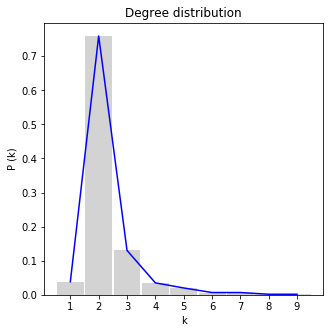

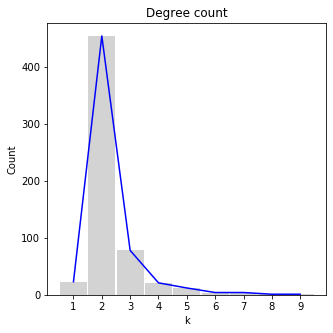

In [17]:
''' The degree distribution of the Belgian railway system'''

#Sort degree values
degree_sequence=sorted([d for n, d in B.degree()], reverse=True)

#Count number of frequences of degree values
degreeCount=collections.Counter(degree_sequence)

#Define variables deg and cnt and probability
deg, cnt = zip(*degreeCount.items())
probability = []
for v in cnt:
    pv= v/len(B.nodes())
    probability.append(pv)

#plot degree probability histogram
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, probability, width=0.95, color='lightgrey')

#plot degree distribution
plt.plot(deg, probability, color="b")

#graph settings
plt.title("Degree distribution")
plt.ylabel("P (k)")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#count
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, cnt, width=0.95, color='lightgrey')

plt.plot(deg, cnt, color="b")

#graph settings
plt.title("Degree count")
plt.ylabel("Count")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [18]:
''' Detection of the scale-free property in the Belgian railway system:
A PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '''
print("The scale-free property is present in the Belgian railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher")

' Detection of the scale-free property in the Belgian railway system:\nA PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '

The scale-free property is present in the Belgian railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher


In [19]:
''' The average path length of the Belgian railway system:
The average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs
which can be reached by means of one or multiple routes.'''
print(nx.average_shortest_path_length(B))

' The average path length of the Belgian railway system:\nThe average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs\nwhich can be reached by means of one or multiple routes.'

17.861385475234645


In [20]:
''' The assortativity of the Belgian railway system:
In an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. 
In a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'''
print(nx.degree_pearson_correlation_coefficient(B))

' The assortativity of the Belgian railway system:\nIn an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. \nIn a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'

0.22080632042520495


## **Calculation of the global characteristics of the Dutch railway system in the L-space representation**

In [21]:
''' To construct the network graph for the Netherlands '''
N = nx.Graph()
N = nx.from_pandas_edgelist(df_for_edges_Netherlands, 'stop_name_1', 'stop_name_2')

' To construct the network graph for the Netherlands '

In [22]:
''' To assign weights to the network graph for the Netherlands'''
# To assign node weights to graph
for i in range(len(stops_cleaned_Netherlands)):
    for n, d in N.nodes(data=True):
        if stops_cleaned_Netherlands.stop_name[i] == n:
            N.nodes[n]['latitude']=stops_cleaned_Netherlands.stop_lat[i];
            N.nodes[n]['longitude']=stops_cleaned_Netherlands.stop_lon[i];
            N.nodes[n]['country']=stops_cleaned_Netherlands.country[i];
            
N.nodes(data=True)

# To assign edge weights to the graph: the edge weight represents a list that contains all route_ids that cover that edge
routes_on_edge = {}
for node1,node2, nodeData in N.edges(data = True):
    if (node1, node2) not in routes_on_edge:
            routes_on_edge[(node1, node2)] = set()
    route_id_node1_node2= df_for_edges_Netherlands[(df_for_edges_Netherlands['stop_name_1'] == node1 ) & (df_for_edges_Netherlands['stop_name_2'] == node2 )]['route_id']
    route_id_node2_node1= df_for_edges_Netherlands[(df_for_edges_Netherlands['stop_name_1'] == node2 ) & (df_for_edges_Netherlands['stop_name_2'] == node1 )]['route_id']
    for route_id in pd.concat([route_id_node1_node2, route_id_node2_node1]):
        routes_on_edge[(node1, node2)].add(route_id)
    nodeData['route_id'] = routes_on_edge[(node1, node2)] 

N.edges(data=True)

' To assign weights to the network graph for the Netherlands'

NodeDataView({'AMSTERDAM CENTRAAL': {'latitude': 52.3789197836, 'longitude': 4.90088939667, 'country': 'Netherlands'}, 'SCHIPHOL AIRPORT': {'latitude': 52.309456010699996, 'longitude': 4.76228356361, 'country': 'Netherlands'}, 'ROTTERDAM CENTRAAL': {'latitude': 51.924383443800004, 'longitude': 4.4697457552, 'country': 'Netherlands'}, 'UTRECHT CENTRAAL': {'latitude': 52.089451330600006, 'longitude': 5.10987102985, 'country': 'Netherlands'}, 'GOUDA': {'latitude': 52.0169549682, 'longitude': 4.705415368080001, 'country': 'Netherlands'}, 'ROTTERDAM ALEXANDER': {'latitude': 51.9516764051, 'longitude': 4.55200374126, 'country': 'Netherlands'}, 'WOERDEN': {'latitude': 52.0850970204, 'longitude': 4.892585277559999, 'country': 'Netherlands'}, 'BODEGRAVEN': {'latitude': 52.0817082095, 'longitude': 4.74578797817, 'country': 'Netherlands'}, 'ALPHEN A/D RIJN': {'latitude': 52.124734897399996, 'longitude': 4.657559394840001, 'country': 'Netherlands'}, 'LEIDEN LAMMENSCHANS': {'latitude': 52.146538819

EdgeDataView([('AMSTERDAM CENTRAAL', 'SCHIPHOL AIRPORT', {'route_id': {59426, 17795, 67402, 66765, 17615, 17522, 77589, 77625, 77631}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM SLOTERDIJK', {'route_id': {17792, 61920, 76993, 41226, 17803, 46093, 77614, 41202, 17748, 46036, 52984, 52986, 17661, 52990, 41214}}), ('AMSTERDAM CENTRAAL', 'HILVERSUM', {'route_id': {76452, 77638, 67431, 77592, 77593, 77628, 17725}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM MUIDERPOORT', {'route_id': {61920, 46084, 77610, 46092, 17748}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM AMSTEL', {'route_id': {17792, 77614, 52984, 52986, 52990}}), ('AMSTERDAM CENTRAAL', 'ALMERE CENTRUM', {'route_id': {45189, 44942}}), ('AMSTERDAM CENTRAAL', 'UTRECHT CENTRAAL', {'route_id': {77633, 77602, 77634, 77604, 67402, 66765}}), ('AMSTERDAM CENTRAAL', 'HAARLEM', {'route_id': {74608}}), ('AMSTERDAM CENTRAAL', 'HILVERSUM MEDIA PARK', {'route_id': {75061}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM BIJLMER ARENA', {'route_id': {77624, 77625, 77626}}), ('AMST

In [23]:
''' The number of nodes in the Dutch railway system '''
# The number of total nodes in the Dutch railway system that consists of all routes that contain at least one node in the Netherlands
len(N.nodes())

# The number of belgian nodes in the Dutch railway system that consists of all routes that contain at least one node in the Netherlands
number_dutch_stations = 0
for n, d in N.nodes(data=True):
    if N.nodes[n]['country']=='Netherlands':
        number_dutch_stations += 1

number_dutch_stations

' The number of nodes in the Dutch railway system '

487

394

In [24]:
''' The degrees of the nodes in the Dutch railway system '''
N.degree()

' The degrees of the nodes in the Dutch railway system '

DegreeView({'AMSTERDAM CENTRAAL': 11, 'SCHIPHOL AIRPORT': 9, 'ROTTERDAM CENTRAAL': 12, 'UTRECHT CENTRAAL': 20, 'GOUDA': 11, 'ROTTERDAM ALEXANDER': 4, 'WOERDEN': 5, 'BODEGRAVEN': 2, 'ALPHEN A/D RIJN': 3, 'LEIDEN LAMMENSCHANS': 2, 'LEIDEN CENTRAAL': 11, 'HOOFDDORP': 3, 'AMSTERDAM ZUID': 5, 'AMSTERDAM RAI': 2, 'DUIVENDRECHT': 7, 'DIEMEN ZUID': 2, 'WEESP': 4, 'ALMERE POORT': 3, 'ALMERE MUZIEKWIJK': 2, 'ALMERE CENTRUM': 7, 'ALMERE PARKWIJK': 2, 'ALMERE BUITEN': 4, 'ALMERE OOSTVAARDERS': 2, 'AMERSFOORT SCHOTHORST': 2, 'AMERSFOORT CENTRAAL': 10, 'DEN HAAG CENTRAAL': 5, 'GRONINGEN': 5, 'ASSEN': 4, 'ZWOLLE': 11, 'BREDA': 7, 'LEEUWARDEN': 7, 'GROU-JIRNSUM': 2, 'AKKRUM': 2, 'HEERENVEEN': 4, 'WOLVEGA': 2, 'STEENWIJK': 3, 'MEPPEL': 3, 'UTRECHT OVERVECHT': 4, 'BILTHOVEN': 2, 'DEN DOLDER': 3, 'SOEST ZUID': 2, 'SOEST': 2, 'SOESTDIJK': 2, 'BAARN': 3, 'WEZEP': 2, "HARDE ('T)": 2, 'NUNSPEET': 2, 'HARDERWIJK': 3, 'ERMELO': 2, 'PUTTEN': 2, 'NIJKERK': 4, 'AMERSFOORT VATHORST': 2, 'UTRECHT LEIDSCHE RIJN': 2,

In [25]:
''' The average degree of the nodes in the Dutch railway system indicating the number of directions 
a commuter can take from that given station.'''
# The average degree of all the nodes in the Dutch railway system that consists of all routes that cover at least one dutch station
sum = 0
for n in N.nodes():
    sum = sum + N.degree[n]
print(sum/len(N.nodes()))

# The average degree of all the nodes in the Dutch railway system if only the dutch stations are considered
sum = 0
number_dutch_stations = 0
for n, d in N.nodes(data=True):
    if N.nodes[n]['country']=='Netherlands':
        number_dutch_stations += 1
        sum = sum + N.degree[n]
print(sum/number_dutch_stations)

' The average degree of the nodes in the Dutch railway system indicating the number of directions \na commuter can take from that given station.'

2.6776180698151952
2.8096446700507616


In [26]:
''' The number of edges in the Dutch railway system '''
len(N.edges())

' The number of edges in the Dutch railway system '

652

In [27]:
''' The gamma index of the Dutch railway system'''
gamma_index = len(N.edges()) / (3*(len(N.nodes()) - 2))
gamma_index

' The gamma index of the Dutch railway system'

0.44810996563573885

In [28]:
''' The mean local clustering coefficient of the Dutch railway system '''
#The mean local clustering coefficient indicates for a random station the estimation of the division of the number of neighbouring stations of a station that are connected 
# divided by the possible number of connections between the neighbours of that station
print ("mean local clustering:", nx.average_clustering(N))

' The mean local clustering coefficient of the Dutch railway system '

mean local clustering: 0.10167858070986471


' The degree distribution of the Dutch railway system'

<BarContainer object of 13 artists>

Text(0.5, 1.0, 'Degree distribution')

Text(0, 0.5, 'P (k)')

Text(0.5, 0, 'k')

[Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

<BarContainer object of 13 artists>

Text(0.5, 1.0, 'Degree count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'k')

[Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

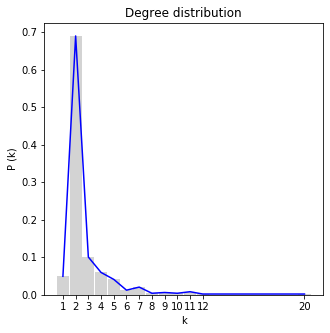

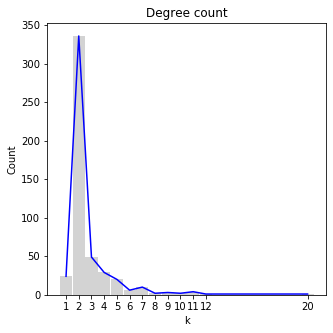

In [29]:
''' The degree distribution of the Dutch railway system'''

#Sort degree values
degree_sequence=sorted([d for n, d in N.degree()], reverse=True)

#Count number of frequences of degree values
degreeCount=collections.Counter(degree_sequence)

#Define variables deg and cnt and probability
deg, cnt = zip(*degreeCount.items())
probability = []
for v in cnt:
    pv= v/len(N.nodes())
    probability.append(pv)

#plot degree probability histogram
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, probability, width=0.95, color='lightgrey')

#plot degree distribution
plt.plot(deg, probability, color="b")

#graph settings
plt.title("Degree distribution")
plt.ylabel("P (k)")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#count
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, cnt, width=0.95, color='lightgrey')

plt.plot(deg, cnt, color="b")

#graph settings
plt.title("Degree count")
plt.ylabel("Count")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [30]:
''' Detection of the scale-free property in the Dutch railway system:
A PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '''
print("The scale-free property is present in the Dutch railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 6 or higher")

' Detection of the scale-free property in the Dutch railway system:\nA PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '

The scale-free property is present in the Dutch railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 6 or higher


In [31]:
''' The average path length of the Dutch railway system:
The average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs
which can be reached by means of one or multiple routes.'''
print(nx.average_shortest_path_length(N))

' The average path length of the Dutch railway system:\nThe average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs\nwhich can be reached by means of one or multiple routes.'

9.765896857386705


In [32]:
''' The assortativity of the Dutch railway system:
In an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. 
In a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'''
print(nx.degree_pearson_correlation_coefficient(N))

' The assortativity of the Dutch railway system:\nIn an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. \nIn a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'

0.26676313176398825


# To export the railway graphs

In [33]:
nx.write_gpickle(B, "B_graph")
nx.write_gpickle(N, "N_graph")